## 1. Load the shared library

In [1]:
import ctypes
import sys
import numpy as np
from scipy.stats import norm,logistic
import matplotlib.pyplot as plt
%matplotlib inline

if sys.platform == 'darwin':
    libname = './distlib.dylib'
else:
    libname = './distlib.so'

lib = ctypes.cdll.LoadLibrary(libname)

In [2]:
# Declare return types
lib.dnorm.restype            = ctypes.c_double
lib.dlogis.restype           = ctypes.c_double
lib.pnorm.restype            = ctypes.c_double
lib.plogis.restype           = ctypes.c_double
lib.grad_norm.restype        = ctypes.c_double
lib.grad_logis.restype       = ctypes.c_double
lib.neg_grad_uncensored.restype = ctypes.c_double
lib.neg_grad_left.restype = ctypes.c_double
lib.neg_grad_right.restype = ctypes.c_double
lib.neg_grad_interval.restype = ctypes.c_double
lib.loss_uncensored.restype = ctypes.c_double
lib.loss_left.restype = ctypes.c_double
lib.loss_right.restype = ctypes.c_double
lib.loss_interval.restype = ctypes.c_double

## 2. Visualize PDF

In [3]:
# Parameters of distribution
mu     = 0.0
sd     = 1.0
x_vals = np.linspace(-4, 4, 200)

In [4]:
# Call dnorm() function for every x in x_vals
y_vals_dnorm = [lib.dnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call dlogis() function for every x in x_vals
y_vals_dlogis = [lib.dlogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

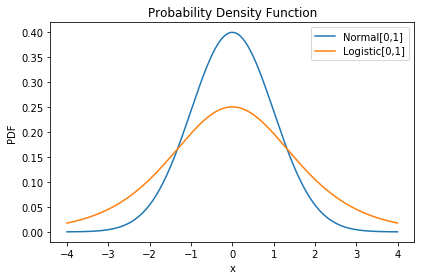

In [5]:
plt.plot(x_vals, y_vals_dnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_dlogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
x_vals = np.linspace(-4, 4, 200)
# Call pnorm() function for every x in x_vals
y_vals_pnorm = [lib.pnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call plogis() function for every x in x_vals
y_vals_plogis = [lib.plogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

## 3. Visualize CDF

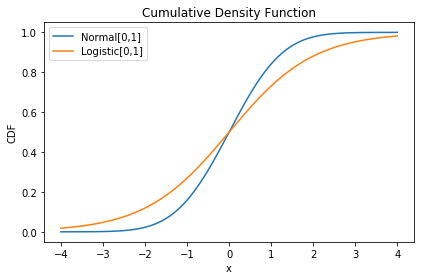

In [7]:
plt.plot(x_vals, y_vals_pnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_plogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

# 4. Verifying with SCIPY

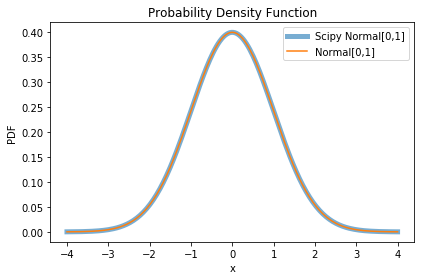

In [8]:
plt.plot(x_vals, norm.pdf(x_vals),lw=5, alpha=0.6, label='Scipy Normal[0,1]')
plt.plot(x_vals, y_vals_dnorm, label='Normal[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

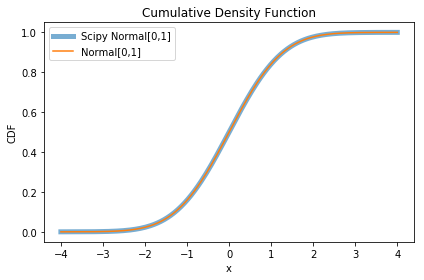

In [9]:
plt.plot(x_vals, norm.cdf(x_vals),lw=5, alpha=0.6, label='Scipy Normal[0,1]')
plt.plot(x_vals, y_vals_pnorm, label='Normal[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

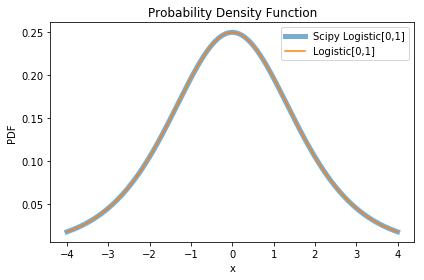

In [10]:
plt.plot(x_vals, logistic.pdf(x_vals),lw=5, alpha=0.6, label='Scipy Logistic[0,1]')
plt.plot(x_vals, y_vals_dlogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

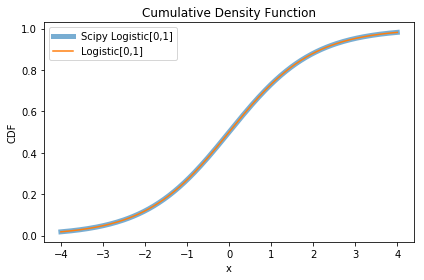

In [11]:
plt.plot(x_vals, logistic.cdf(x_vals),lw=5, alpha=0.6, label='Scipy Logistic[0,1]')
plt.plot(x_vals, y_vals_plogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()

# 5. Visualizing Gradient

In [12]:
# Call pnorm() function for every x in x_vals
y_vals_grad_norm = [lib.grad_norm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call plogis() function for every x in x_vals
y_vals_grad_logis = [lib.grad_logis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

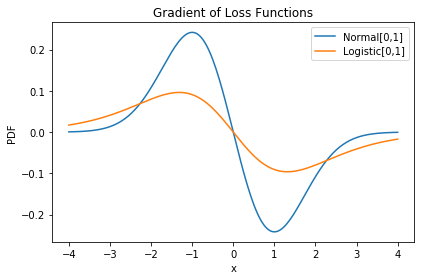

In [13]:
plt.plot(x_vals, y_vals_grad_norm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_grad_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Gradient of Loss Functions')
plt.legend(loc='best')
plt.tight_layout()

# 6. Visualizing Loss of All Data Types

# Uncensored

In [7]:
y_lower  = 10
y_higher = 10
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(-40, 40, 200)
loss_uncensored_norm = [lib.loss_uncensored(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

In [8]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
loss_uncensored_logis = [lib.loss_uncensored(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

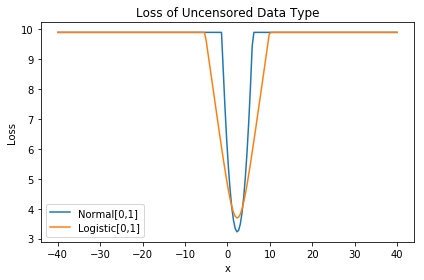

In [9]:
plt.plot(x_vals, loss_uncensored_norm, label='Normal[0,1]')
plt.plot(x_vals, loss_uncensored_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Loss of Uncensored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Left

In [26]:
y_lower  = -float('inf')
y_higher = 10
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(-5, 10, 200)

loss_left_norm = [lib.loss_left(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]

In [27]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
loss_left_logis = [lib.loss_left(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

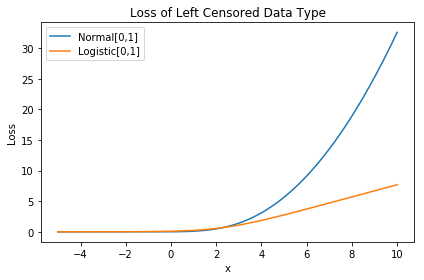

In [28]:
plt.plot(x_vals, loss_left_norm, label='Normal[0,1]')
plt.plot(x_vals, loss_left_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Loss of Left Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Right

In [41]:
y_lower  = 10
y_higher = -float('inf')
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(0, 10, 200)
loss_right_norm = [lib.loss_right(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]

In [42]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
loss_right_logis = [lib.loss_right(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

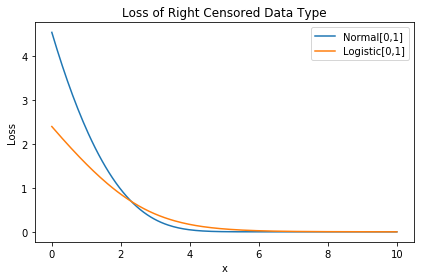

In [43]:
plt.plot(x_vals, loss_right_norm, label='Normal[0,1]')
plt.plot(x_vals, loss_right_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Loss of Right Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Interval

In [35]:
y_lower  = 50
y_higher = 100
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(np.log(10), np.log(500), 200)
loss_interval_norm = [lib.loss_interval(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]

In [36]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
loss_interval_logis = [lib.loss_interval(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

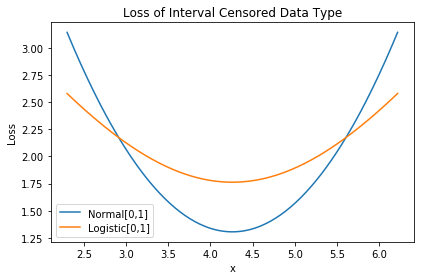

In [37]:
plt.plot(x_vals, loss_interval_norm, label='Normal[0,1]')
plt.plot(x_vals, loss_interval_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Loss of Interval Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# 7. Visualizing Negative Gradient of All Data Types

# Uncensored

In [6]:
y_lower  = 10
y_higher = 10
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(-20, 20, 200)
neg_grad_uncen_norm = [lib.neg_grad_uncensored(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

In [7]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
neg_grad_uncen_logis = [lib.neg_grad_uncensored(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]


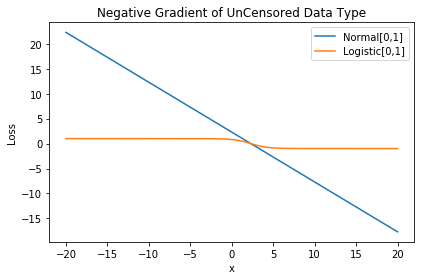

In [8]:
plt.plot(x_vals, neg_grad_uncen_norm, label='Normal[0,1]')
plt.plot(x_vals, neg_grad_uncen_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Negative Gradient of UnCensored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Left

In [29]:
y_lower  = -float('inf')
y_higher = 10
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(-5, 10, 200)
neg_grad_left_norm = [lib.neg_grad_left(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

In [30]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
neg_grad_left_logis = [lib.neg_grad_left(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

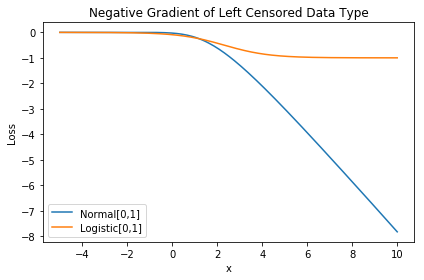

In [31]:
plt.plot(x_vals, neg_grad_left_norm, label='Normal[0,1]')
plt.plot(x_vals, neg_grad_left_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Negative Gradient of Left Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Right

In [38]:
y_lower  = 10
y_higher = -float('inf')
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(0, 50, 200)
neg_grad_right_norm = [lib.neg_grad_right(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

In [39]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
neg_grad_right_logis = [lib.neg_grad_right(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]  

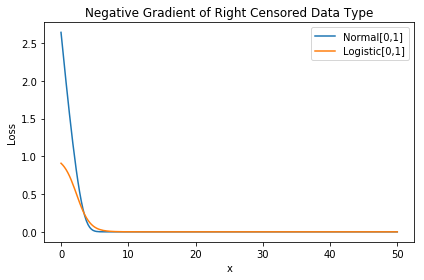

In [40]:
plt.plot(x_vals, neg_grad_right_norm, label='Normal[0,1]')
plt.plot(x_vals, neg_grad_right_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Negative Gradient of Right Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()

# Interval

In [3]:
y_lower  = 50
y_higher = 100
sigma    = 1
dist     = 'normal'
b_dist   = dist.encode('utf-8')
x_vals   = np.linspace(np.log(10), np.log(500), 200)
neg_grad_interval_norm = [lib.neg_grad_interval(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals]

In [4]:
dist     = 'logistic'
b_dist   = dist.encode('utf-8')
neg_grad_interval_logis = [lib.neg_grad_interval(ctypes.c_double(y_lower),ctypes.c_double(y_higher),ctypes.c_double(x),ctypes.c_double(sigma),ctypes.c_char_p(b_dist)) for x in x_vals] 


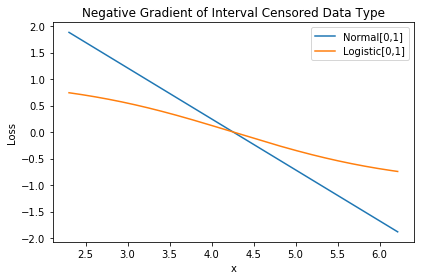

In [5]:
plt.plot(x_vals, neg_grad_interval_norm, label='Normal[0,1]')
plt.plot(x_vals, neg_grad_interval_logis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Negative Gradient of Interval Censored Data Type')
plt.legend(loc='best')
plt.tight_layout()